In [1]:
import sympy
from sympy import I
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class graph:
  def __init__(this, polar=False):
    this.is_polar = polar
    if (polar):
      this.ax = plt.gca(projection='polar')
      return
    this.ax = plt.gca()
  def normalize(this):
    this.ax.set_aspect('equal')
    this.ax.spines['right'].set_color('none')
    this.ax.spines['top'].set_color('none')
    this.ax.set_xlabel("Re")
    this.ax.set_ylabel("Im")
    dx = this.ax.get_xlim()[1] - this.ax.get_xlim()[0]
    dy = this.ax.get_ylim()[1] - this.ax.get_ylim()[0]

    if (this.ax.get_ylim()[0] > 0 and this.ax.get_ylim()[1] > 0):
      this.ax.spines['bottom'].set_position(('data', this.ax.get_ylim()[0]))
      this.ax.plot(1, this.ax.get_ylim()[0], ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40 + this.ax.get_ylim()[0], transform=this.ax.get_yaxis_transform())
    elif (this.ax.get_ylim()[0] < 0 and this.ax.get_ylim()[1] < 0):
      this.ax.spines['bottom'].set_position(('data', this.ax.get_ylim()[1]))
      this.ax.plot(1, this.ax.get_ylim()[1], ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40 + this.ax.get_ylim()[1], transform=this.ax.get_yaxis_transform())
    else:
      this.ax.spines['bottom'].set_position(('data', 0))
      this.ax.plot(1, 0, ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40, transform=this.ax.get_yaxis_transform())

    if (this.ax.get_xlim()[0] > 0 and this.ax.get_xlim()[1] > 0):
      this.ax.spines['left'].set_position(('data', this.ax.get_xlim()[0]))
      this.ax.plot(this.ax.get_xlim()[0], 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3 + this.ax.get_xlim()[0] + 0.075, 1, transform=this.ax.get_xaxis_transform())
    elif (this.ax.get_xlim()[0] < 0 and this.ax.get_xlim()[1] < 0):
      this.ax.spines['left'].set_position(('data', this.ax.get_xlim()[1]))
      this.ax.plot(this.ax.get_xlim()[1], 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3 + this.ax.get_xlim()[1], 1, transform=this.ax.get_xaxis_transform())
    else:
      this.ax.spines['left'].set_position(('data', 0))
      this.ax.plot(0, 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3, 1, transform=this.ax.get_xaxis_transform())

  def xlim(this, xmin, xmax):
    this.ax.set_xlim(xmin, xmax)
  def ylim(this, ymin, ymax):
    this.ax.set_ylim(ymin, ymax)

  def draw_number(this, number, form="default"):
    if (this.is_polar):
      xy = (sympy.functions.arg(number), sympy.functions.Abs(number))
      xytext = (sympy.functions.arg(number), sympy.functions.Abs(number) - 0.175)

      picture.ax.scatter([sympy.functions.arg(number)], [sympy.functions.Abs(number)])
      picture.ax.annotate(f"${sympy.latex(sympy.simplify(sympy.functions.arg(number)))}$", xy=xy, xytext=xytext)
      return

    xy = (sympy.re(number), sympy.im(number))
    xytext = (sympy.re(number) - 0.1, sympy.im(number) + 0.1)

    this.ax.scatter([sympy.re(number)], [sympy.im(number)])
    if (form == "default"):
      this.ax.annotate(f"${sympy.latex(number)}$", xy=xy, xycoords='data', xytext=xytext, textcoords='data')
      return
    if (form == "trig"):
      r = sympy.functions.Abs(number)
      phi = sympy.functions.arg(number)
      this.ax.annotate(f"${sympy.latex(r)} * (cos({sympy.latex(phi)}) + i * sin({sympy.latex(phi)}))$", xy=xy, xycoords='data', xytext=xytext, textcoords='data')
      return
    if (form == "exp"):
      r = sympy.functions.Abs(number)
      phi = sympy.functions.arg(number)
      this.ax.annotate(f"${sympy.latex(r * (sympy.E ** (I * phi)))}$", xy=xy, xycoords='data', xytext=xytext, textcoords='data')
      return
    this.ax.annotate(form, xy=xy, xycoords='data', xytext=xytext, textcoords='data')

# Практическое занятие 10
# Компьютерный практикум по алгебре на Python
## Комплексные числа в sympy
### Задание 1.
Даны комплексные числа
$$
z_1 = 5\sqrt{3} + 5i,\quad z_2 = -3 + 3i,\quad z_3 = - 1 + i,\quad z_4 = i,\quad z_5 = \frac{12}{13} + \frac{5}{13}i,
$$
вычислить (представить в алгебраической форме) с помощью sympy
$$
z_1 \cdot z_2,\quad (z_2 - 5z_3)^6,\quad \sqrt{\frac{z_4}{z_3}},\quad \frac{z_1^2 + z_3}{13z_5 - 2z_2}.
$$

In [3]:
z1 = 5 * sympy.sqrt(3) + 5 * I
z2 = -3 + 3 * I
z3 = -1 + I
z4 = I
z5 = sympy.S(12) / 13 + sympy.S(5) / 13 * I
#a + bi
print("\033[95m1)")
display(sympy.expand_complex(z1 * z2))
print("\033[95m2)")
display(sympy.expand_complex((z2 - 5 * z3) ** 6))
print("\033[95m3)")
display(*[sympy.expand_complex(sympy.root(z4 / z3, 2, i)) for i in range(2)])
print("\033[95m4)")
display(sympy.expand_complex((z1 * z1 + z3) / (13 * z5 - 2 * z2)))

1)


-15*sqrt(3) - 15 + I*(-15 + 15*sqrt(3))

2)


512*I

3)


2**(3/4)*sqrt(sqrt(2)/4 + 1/2)/2 - 2**(3/4)*I*sqrt(1/2 - sqrt(2)/4)/2

-2**(3/4)*sqrt(sqrt(2)/4 + 1/2)/2 + 2**(3/4)*I*sqrt(1/2 - sqrt(2)/4)/2

4)


-2*sqrt(3)/13 + 881/325 + I*(67/325 + 36*sqrt(3)/13)

### Задание  2.
Вычисления Задания 1 проделать для мнимой единицы из python (использовать встроенную функцию complex).

In [4]:
z1 = complex(5 * (3 ** 0.5), 5)
z2 = complex(-3, 3)
z3 = complex(-1, 1)
z4 = complex(0, 1)
z5 = complex(12 / 13, 5 / 13)

print(f"\033[95m1)\033[0m {z1 * z2}")
print(f"\033[95m2)\033[0m {(z2 - 5 * z3) ** 6}")
print(f"\033[95m3)\033[0m {(z4 / z3) ** 0.5}")
print(f"\033[95m4)\033[0m {(z1 * z1 + z3) / (13 * z5 - 2 * z2)}")

1) (-40.98076211353316+10.980762113533157j)
2) (-0+512j)
3) (0.7768869870150187-0.32179712645279135j)
4) (2.4442998757586336+5.002602236344583j)


### Задание  3.
Изобразить на координатной плоскости точки, соответствующие корням  $7$-й степени комплексного числа $z = \frac{3}{5} + i\frac{3}{5}$. Подписать точки $Ak$, где $k$  - номер корня.

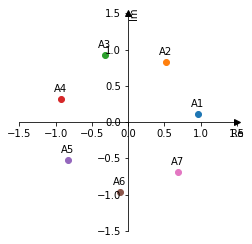

In [5]:
z = sympy.S(3) / 5 + I * sympy.S(3) / 5
picture = graph()
for i in range(7):
  picture.draw_number(sympy.root(z, 7, i), f"A{i + 1}")
picture.xlim(-1.5, 1.5)
picture.ylim(-1.5, 1.5)
picture.normalize()

### Задание  4.
Изобразить на координатной плоскости точки, соответствующие $z_4 = - \sqrt{3} + 3i$ и $\bar{z_4}$, подписать $z_4$ тригонометрической формой, $\bar{z_4}$ - экспоненциальной ($z = r e^{i\varphi}$, $r$ и $\varphi$ такие же, как в тригонометрической форме).

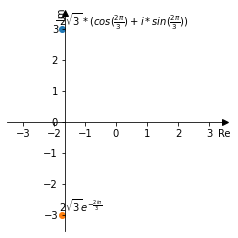

In [6]:
z4 = -sympy.sqrt(3) + 3 * I
z4_c = sympy.conjugate(z4)

picture = graph()
picture.draw_number(z4, "trig")
picture.draw_number(z4_c, "exp")
picture.normalize()
picture.xlim(-3.5, 3.5)
picture.ylim(-3.5, 3.5)

#### Задание  5.
Изобразить корни 4 степени числа $5e^{\frac{i\pi}{8}}$, в полярной системе координат, подписи к точкам - аргументы (углы) сответствующих комплексных чисел. 

Число вводить в тригонометрической форме, для получения корней комплексного числа $z = r(\cos(\varphi) + \sin(\varphi))$ использовать формулу 
$\sqrt[n]{z} = \sqrt[n]{r}(\cos(\varphi_k) + i \sin(\varphi_k))$, 
$\varphi_k = \frac{\varphi + 2\pi k}{n}$, $k = 0, ..., n$. 

Вывести алгебраическую форму полученных корней на экран и сравнить с результатом, полученным с помощью sympy.root (с использованием sympy.expand_complex для упрощения выражения). Аналитическое представление оказывается разным.

Для каждого корня найти разность модуля разности корней, полученных двумя способами (т.е. нужно для каждой пары одинаковых корней, полученных двумя способами находить разность корней, вычислять модуль sympy.Abs этой разности и вычислить приближенное значение с помощью evalf()).

1)


5**(1/4)*cos(pi/32) + 5**(1/4)*I*sin(pi/32)

5**(1/4)*cos(atan(sqrt(2 - sqrt(2))/sqrt(sqrt(2) + 2))/4) + 5**(1/4)*I*sin(atan(sqrt(2 - sqrt(2))/sqrt(sqrt(2) + 2))/4)

5.24560964393985e-68

2)


-5**(1/4)*sin(pi/32) + 5**(1/4)*I*cos(pi/32)

-5**(1/4)*sin(atan(sqrt(2 - sqrt(2))/sqrt(sqrt(2) + 2))/4) + 5**(1/4)*I*cos(atan(sqrt(2 - sqrt(2))/sqrt(sqrt(2) + 2))/4)

5.24560964393985e-68

3)


-5**(1/4)*cos(pi/32) - 5**(1/4)*I*sin(pi/32)

-5**(1/4)*cos(atan(sqrt(2 - sqrt(2))/sqrt(sqrt(2) + 2))/4) - 5**(1/4)*I*sin(atan(sqrt(2 - sqrt(2))/sqrt(sqrt(2) + 2))/4)

5.24560964393985e-68

4)


5**(1/4)*sin(pi/32) - 5**(1/4)*I*cos(pi/32)

5**(1/4)*sin(atan(sqrt(2 - sqrt(2))/sqrt(sqrt(2) + 2))/4) - 5**(1/4)*I*cos(atan(sqrt(2 - sqrt(2))/sqrt(sqrt(2) + 2))/4)

5.24560964393985e-68

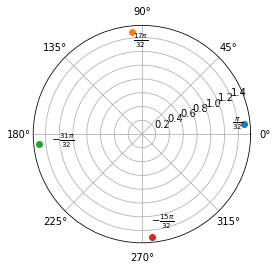

In [7]:
z = 5 * (sympy.E ** (I * sympy.pi / 8))
z = sympy.simplify(sympy.functions.Abs(z)) * (sympy.simplify(sympy.cos(sympy.functions.arg(z))) + I * sympy.simplify(sympy.sin(sympy.functions.arg(z))))
Roots = []
for i in range(4):
  #################################
  r = 5
  phi = sympy.pi / 8
  #################################
  phi2 = (phi + 2 * sympy.pi * i) / 4
  Roots.append((r ** (sympy.S(1) / 4)) * (sympy.cos(phi2) + I * sympy.sin(phi2)))

picture = graph(True)
for i in range(len(Roots)): 
  picture.draw_number(Roots[i])

for i in range(len(Roots)):
  print(f"\033[95m{i + 1})")
  n1 = sympy.expand_complex(sympy.simplify(Roots[i]))
  n2 = sympy.expand_complex(sympy.simplify(sympy.root(z, 4, i)))
  display(n1)
  display(n2)
  display(sympy.functions.Abs(n1 - n2).evalf())

### Индивидуальное задание.
Решить уравнение.
Для получения корней использовать sympy.roots.
Корни уравнения вывести на экран в алгебраической, тригонометрической и экспоненциальной форме.

Вариант N 2

$(9 - 8 i)x^2 + (-95 + 165 i)x + 666 - 882 i = 0$

In [8]:
a = 9 - 8 * I
b = -95 + 165 * I
c = 666 - 882 * I
x = sympy.Symbol('x')
Roots = sympy.roots(a * (x ** 2) + b * x + c)
display(Roots)

root_number = 1
for i in Roots:
  for j in range(Roots[i]):
    print(f"\033[95m{root_number})")
    root_number = root_number + 1
    r = sympy.Symbol('r')
    phi = sympy.Symbol('phi')

    display(sympy.expand_complex(i))

    trig = r * (sympy.cos(phi) + I * sympy.cos(phi))
    display(trig.subs({r: sympy.UnevaluatedExpr(sympy.functions.Abs(i)), phi: sympy.UnevaluatedExpr(sympy.functions.arg(i))}))

    exp = r * (sympy.E ** (phi * I))
    display(exp.subs({r: sympy.UnevaluatedExpr(sympy.functions.Abs(i)), phi: sympy.UnevaluatedExpr(sympy.functions.arg(i))}))

{6 + 4*I: 1, 9 - 9*I: 1}

1)


6 + 4*I

(2*sqrt(13))*(cos(atan(2/3)) + I*cos(atan(2/3)))

(2*sqrt(13))*exp(I*atan(2/3))

2)


9 - 9*I

(9*sqrt(2))*(cos(-pi/4) + I*cos(-pi/4))

(9*sqrt(2))*exp(I*(-pi/4))